# Work In Progress Vortex Panel Code

This project aims to use a vortex panel method to estimate the lift generated by a 2D airfoil.

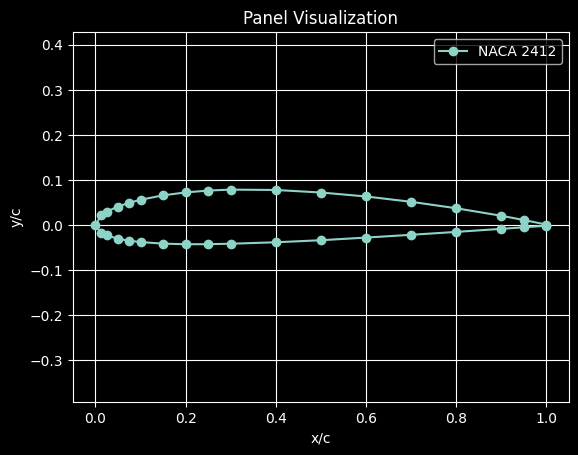

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

with open('Airfoils/naca2412.txt', 'r') as f:
    airfoilName = f.readline().strip()

airfoilX = [] # x-cord
airfoilY = [] # y-cord

cords = np.loadtxt('Airfoils/naca2412.txt', skiprows=1)
airfoilX = cords[:,0]
airfoilY = cords[:,1]

plt.plot(airfoilX,airfoilY, marker='o', label= airfoilName)
plt.title("Panel Visualization")
plt.xlabel("x/c")
plt.ylabel("y/c")
plt.axis('equal')
plt.legend()
plt.grid(True)


# Airfoil Plotting
Firstly, the airfoil file is read in and plotted. This is done to demonstrate the airfoil file is being read as expected by the code. For testing and development, few nodes maybe be used than the dat file, and this plot will be used for comparison to ensure panels are forming as intended.

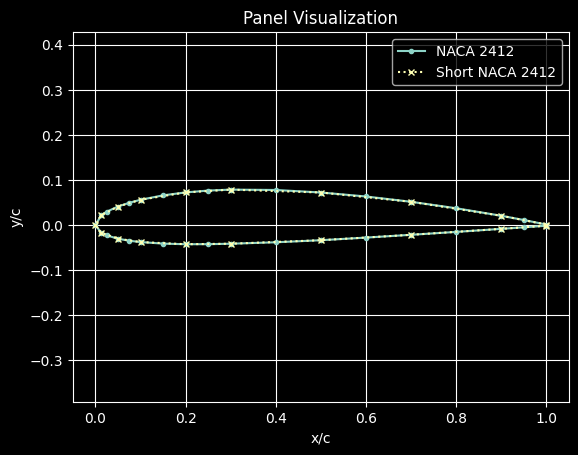

In [2]:
with open('Airfoils/short_naca2412.txt', 'r') as f:
    shortAirfoilName = f.readline().strip()

shortCords = np.loadtxt('Airfoils/short_naca2412.txt', skiprows=1)
shortAirfoilX = shortCords[:,0]
shortAirfoilY = shortCords[:,1]
plt.plot(airfoilX,airfoilY, marker='o', markersize=3, linestyle='-', label= airfoilName)
plt.plot(shortAirfoilX, shortAirfoilY, marker='x', markersize=5, linestyle='dotted', label= shortAirfoilName)
plt.title("Panel Visualization")
plt.xlabel("x/c")
plt.ylabel("y/c")
plt.axis('equal')
plt.legend()
plt.grid(True)


n = len(shortCords) # The number of nodes
p = n-1 # The number of panels

# Panel Method Theory
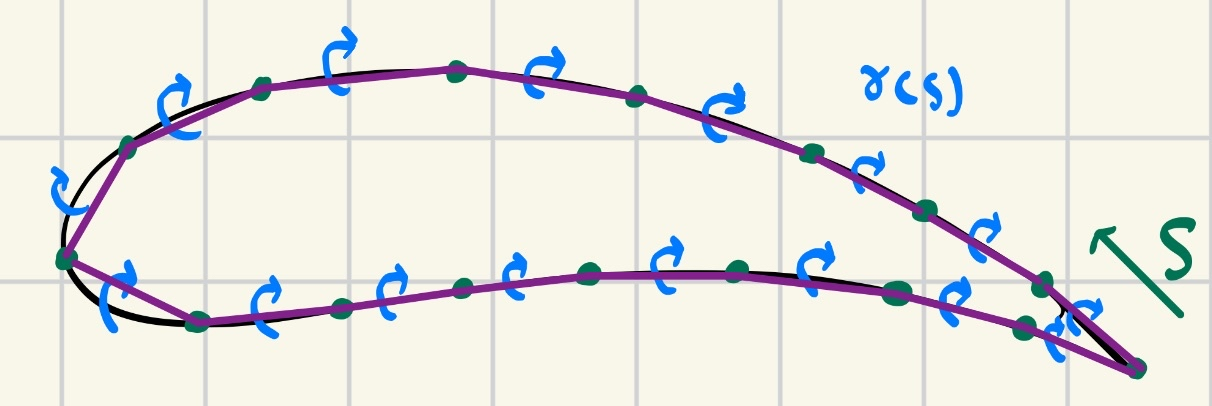

The Kutta-Joukowski Theorem (1) gives lift as a function of circulation across the airfoil. Equation (2) demonstrates that the total circulation $\Gamma$ can be broken up into local vortices $\gamma (s)$across the surface.As demonstrated above, the airfoil is broken up into smaller "panels" which are represented by the distance between two plotted points. Hence, the goal is to determine the local vortex strength across the surface of the airfoil. This is done using a zero penetration boundary condition on the surface of the airfoil, meaning the normal component of the velocity at the surface is 0. The normal velocity at the surface has two components as illustrated in (3), a free stream component $V_\infty,n$ and a component induced by the vortex panel $V_n$. Expanded out, (3) becomes (4) which is the fundamental equation for the vortex panel method.
$$ L = \rho V \Gamma \tag{1} $$
$$ \Gamma = \int_{a}^{b} \gamma ds \tag{2}$$
$$ V_{\infty,n} + V_n = 0\tag{3}$$
$$ V_\infty cos(\beta_i) - \sum_{j=1}^{n} \frac {\gamma_j} {2\pi} \int_{j} \frac {\partial \theta_{ij}} {\partial n_i} = 0 \tag{4}$$

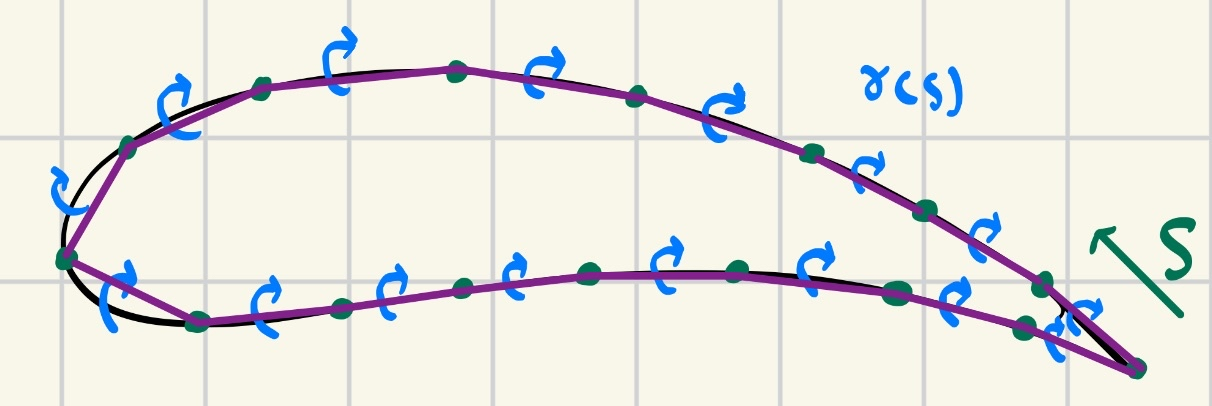
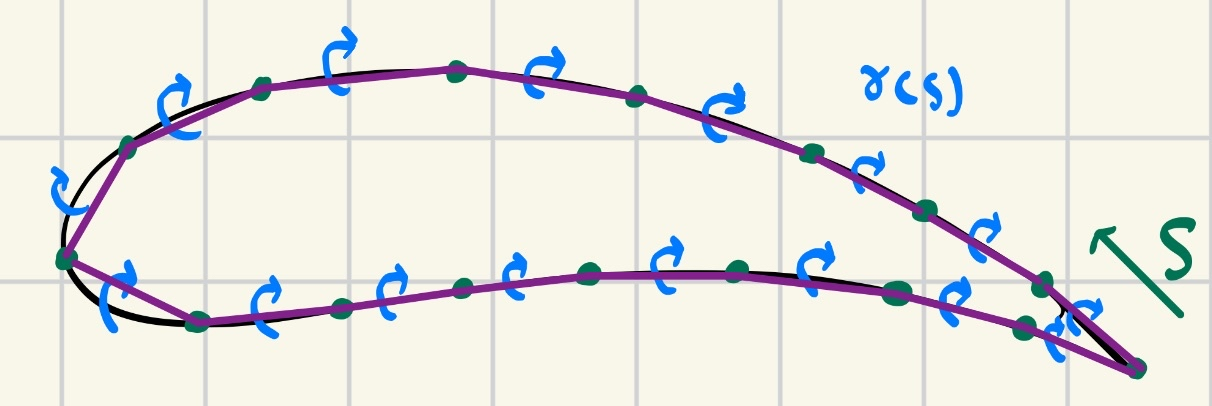
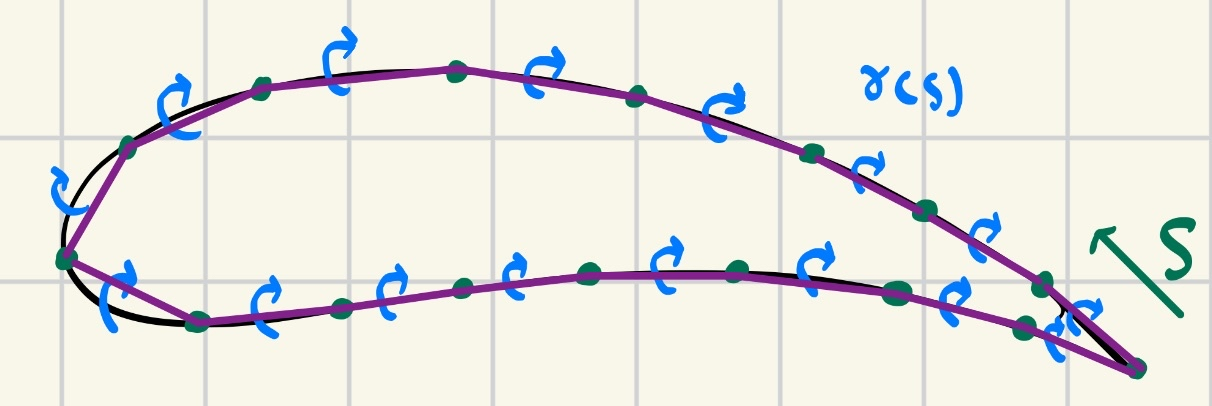
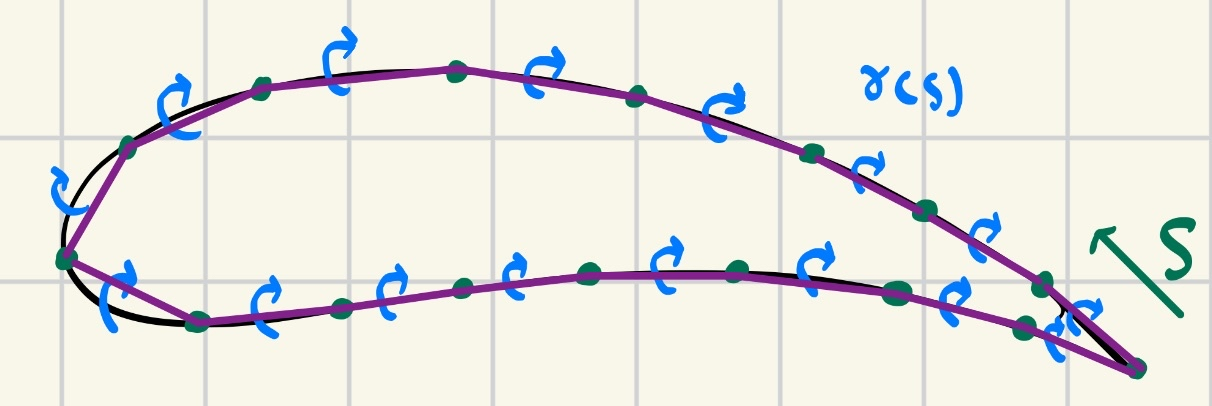